In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='training',
                                               target_size=(100, 100))

valid_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='validation',
                                               target_size=(100, 100))

test_data = train_datagen.flow_from_directory('data/test',
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=256,
                                              target_size=(100, 100))

Found 3161 images belonging to 10 classes.
Found 349 images belonging to 10 classes.
Found 1170 images belonging to 10 classes.


In [3]:
train_data.class_indices

{'Apple 5': 0,
 'Apricot 1': 1,
 'Avocado 1': 2,
 'Banana 3': 3,
 'Beans 1': 4,
 'Blackberrie 1': 5,
 'Cabbage white 1': 6,
 'Cactus fruit 1': 7,
 'Carrot 1': 8,
 'Corn 1': 9}

In [4]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=5
)

model.save('models/vgg2.h5')

/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.5966 - loss: 1.1744 - val_accuracy: 0.9398 - val_loss: 0.3096
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 96s 8s/step - accuracy: 0.9019 - loss: 0.3018 - val_accuracy: 0.9971 - val_loss: 0.0929
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.9598 - loss: 0.1358 - val_accuracy: 1.0000 - val_loss: 0.0371
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 8s/step - accuracy: 0.9839 - loss: 0.0715 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.9924 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0067


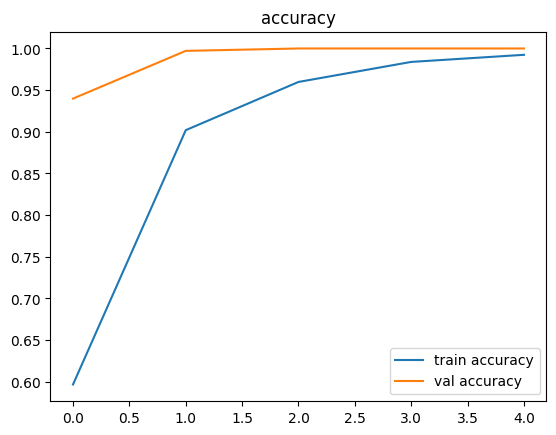

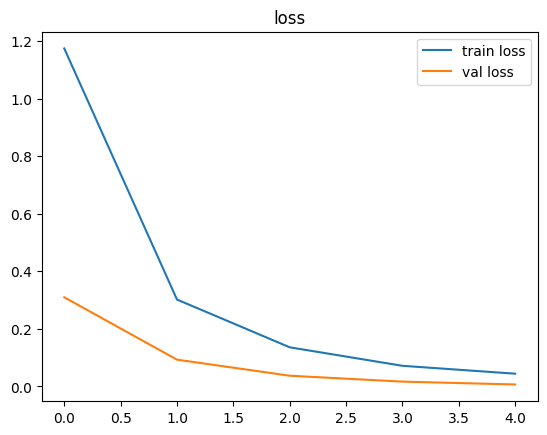

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.legend()
plt.show()

In [6]:
loss, accuracy = model.evaluate(test_data)
print(accuracy * 100)

5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.9291 - loss: 0.4001
92.90598034858704
